In [1]:
import datetime
from mdagent.utils import _make_llm

In [2]:
prompt = "Write me a code to run simulation of fibronectin."
model = "gpt-4o-2024-08-06"

In [3]:
# Parameters
prompt = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."


In [7]:
llm = _make_llm(model, temp=0.1, streaming=True)

system_prompt = (
    "You are an expert molecular dynamics scientist, and your "
    "task is to respond to the question or "
    "solve the problem in its entirety to the best of your ability. "
    "If any part of the task requires you to perform an action that "
    "you are not capable of completing, please write a runnable "
    "Python script for that step and move on. For literature papers, "
    "use and process papers from the `paper_collection` folder. "
    "For .pdb files, download them from the RSCB website using `requests`. "
    "To preprocess PDB files, you will use PDBFixer. "
    "To get information about proteins, retrieve data from the UniProt database. "
    "For anything related to simulations, you will use OpenMM, "
    "and for anything related to analyses, you will use MDTraj. "
    "At the end, combine any scripts into one script. "
)
messages = [
    ("system", system_prompt),
    ("human", prompt),
]

now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",llm.model_name,"\nTemperature: ",llm.temperature)

date: 2024-10-16
time: 20:04:57
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1


In [8]:
ai_msg = llm.invoke(messages)
print(ai_msg.content)

To simulate the protein structure 1L6X at two different pH conditions (5.0 and 8.8), and analyze the Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF), we will follow these steps:

1. **Download the PDB file for 1L6X.**
2. **Preprocess the PDB file using PDBFixer to adjust for the desired pH conditions.**
3. **Set up and run molecular dynamics simulations using OpenMM.**
4. **Analyze the trajectories to calculate SASA and RMSF using MDTraj.**

Let's create a Python script to perform these tasks:

```python
import os
import requests
from pdbfixer import PDBFixer
from openmm.app import *
from openmm import *
from openmm.unit import *
import mdtraj as md
import numpy as np

# Step 1: Download the PDB file for 1L6X
pdb_id = "1L6X"
pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
pdb_filename = f"{pdb_id}.pdb"

if not os.path.exists(pdb_filename):
    response = requests.get(pdb_url)
    with open(pdb_filename, 'w') as file:
        file.write(response.

 protein

 structure

1

L

6

X

 at

 different

 p

H

 conditions

 and

 analyze

 the

 solvent

-access

ible

 surface

 area

 (

S

ASA

)

 and

 root

-

mean

-square

 fluct

uation

 (

R

MS

F

),

 we

 need

 to

 follow

 these

 steps

:



1

.

 **

Download

 the

 P

DB

 file

 for

1

L

6

X

.

**


2

.

 **

Prepare

 the

 system

 for

 simulation

 at

 p

H

5

.

0

 and

8

.

8

.

**


3

.

 **

Run

 molecular

 dynamics

 simulations

 using

 Open

MM

.

**


4

.

 **

Analyze

 the

 SAS

A

 and

 RMS

F

 using

 MDT

raj

.

**



Let's

 go

 through

 each

 step

:



###

 Step

1

:

 Download

 the

 P

DB

 file

 for

1

L

6

X

We'll

 use

 the

 `

requests

`

 library

 to

 download

 the

 P

DB

 file

.



```

python

import

 requests

def

 download

_p

db

(p

db

_id

):


 url

 =

 f

"https

://

files

.rc

sb

.org

/download

/{

p

db

_id

}.

p

db

"


 response

 =

 requests

.get

(url

)


 if

 response

.status

_code

 ==

200

:


 with

 open

(f

"{

p

db

_id

}.

p

db

",

 "

w

")

 as

 file

:


 file

.write

(response

.text

)


 else

:


 raise

 Exception

(f

"

Failed

 to

 download

 P

DB

 file

 for

 {

p

db

_id

}")



download

_p

db

("

1

L

6

X

")


``

`



###

 Step

2

:

 Prepare

 the

 system

 for

 simulation

We

 need

 to

 proton

ate

 the

 structure

 according

 to

 the

 desired

 p

H

.

 This

 can

 be

 done

 using

 tools

 like

 P

DB

2

P

QR

 or

 Prop

ka

,

 but

 here

 we'll

 assume

 the

 proton

ation

 states

 are

 adjusted

 accordingly

.



###

 Step

3

:

 Run

 molecular

 dynamics

 simulations

 using

 Open

MM

We'll

 set

 up

 and

 run

 simulations

 for

 both

 p

H

 conditions

.

 Here's

 a

 script

 to

 set

 up

 and

 run

 the

 simulation

:



```

python

from

 open

mm

.app

 import

 *


from

 open

mm

 import

 *


from

 open

mm

.unit

 import

 *


import

 md

traj

 as

 md

def

 run

_sim

ulation

(p

db

_file

,

 p

H

,

 simulation

_time

_ns

=

10

):


 #

 Load

 P

DB

 file

 pdb

 =

 P

DB

File

(p

db

_file

)


 #

 Force

 field

 force

field

 =

 Force

Field

('

amber

99

sb

.xml

',

 '

tip

3

p

.xml

')


 #

 Create

 system

 system

 =

 force

field

.create

System

(p

db

.top

ology

,

 non

bond

ed

Method

=

PM

E

,

 non

bond

ed

Cut

off

=

1

.

0

*

nan

ometer

,

 constraints

=

HB

onds

)


 #

 Add

 a

 bar

ostat

 system

.add

Force

(M

onte

Car

lo

Bar

ostat

(

1

*

bar

,

300

*

kel

vin

,

25

))


 #

 Integr

ator

 integr

ator

 =

 Lange

vin

Integrator

(

300

*

kel

vin

,

1

/p

ic

ose

cond

,

0

.

002

*

pic

oseconds

)


 #

 Simulation

 simulation

 =

 Simulation

(p

db

.top

ology

,

 system

,

 integr

ator

)


 simulation

.context

.set

Positions

(p

db

.positions

)


 #

 Min

imize

 energy

 simulation

.min

imize

Energy

()


 #

 Equ

ilibr

ate

 simulation

.context

.set

Vel

ocities

To

Temperature

(

300

*

kel

vin

)


 simulation

.step

(

100

00

)

 #

20

 ps

 #

 Production

 run

 simulation

_time

_steps

 =

 int

(sim

ulation

_time

_ns

 *

500

000

)

 #

2

 fs

 per

 step

 simulation

.report

ers

.append

(D

CD

Reporter

(f

'

1

L

6

X

_p

H

{

p

H

}.

d

cd

',

100

0

))


 simulation

.report

ers

.append

(State

Data

Reporter

(stdout

,

100

00

,

 step

=True

,


 potential

Energy

=True

,

 temperature

=True

))


 simulation

.step

(sim

ulation

_time

_steps

)



#

 Run

 simulations

 for

 p

H

5

.

0

 and

8

.

8

run

_sim

ulation

("

1

L

6

X

.p

db

",

 p

H

=

5

.

0

)


run

_sim

ulation

("

1

L

6

X

.p

db

",

 p

H

=

8

.

8

)


``

`



###

 Step

4

:

 Analyze

 the

 SAS

A

 and

 RMS

F

 using

 MDT

raj

After

 running

 the

 simulations

,

 we

 can

 analyze

 the

 SAS

A

 and

 RMS

F

.



```

python

import

 md

traj

 as

 md

import

 numpy

 as

 np

def

 analyze

_

trajectory

(d

cd

_file

,

 pdb

_file

):


 traj

 =

 md

.load

(d

cd

_file

,

 top

=p

db

_file

)


 #

 Calculate

 SAS

A

 sasa

 =

 md

.s

hr

ake

_ru

ple

y

(tr

aj

,

 probe

_radius

=

0

.

14

)


 avg

_s

asa

 =

 np

.mean

(s

asa

,

 axis

=

0

)


 #

 Calculate

 RMS

F

 rms

f

 =

 md

.r

ms

f

(tr

aj

,

 traj

[

0

])


 return

 avg

_s

asa

,

 rms

f

#

 Analyze

 trajectories

s

asa

_p

H

5

,

 rms

f

_p

H

5

 =

 analyze

_

trajectory

('

1

L

6

X

_p

H

5

.

0

.d

cd

',

 '

1

L

6

X

.p

db

')


s

asa

_p

H

8

,

 rms

f

_p

H

8

 =

 analyze

_

trajectory

('

1

L

6

X

_p

H

8

.

8

.d

cd

',

 '

1

L

6

X

.p

db

')



#

 Print

 results

print

("

Average

 SAS

A

 at

 p

H

5

.

0

:",

 np

.mean

(s

asa

_p

H

5

))


print

("

Average

 SAS

A

 at

 p

H

8

.

8

:",

 np

.mean

(s

asa

_p

H

8

))


print

("

R

MS

F

 at

 p

H

5

.

0

:",

 rms

f

_p

H

5

)


print

("

R

MS

F

 at

 p

H

8

.

8

:",

 rms

f

_p

H

8

)


``

`



This

 script

 will

 simulate

 the

 protein

 at

 two

 different

 p

H

 levels

 and

 analyze

 the

 SAS

A

 and

 RMS

F

.

 Make

 sure

 to

 have

 Open

MM

 and

 MDT

raj

 installed

 in

 your

 Python

 environment

 to

 run

 these

 scripts

.

To simulate the protein structure 1L6X at different pH conditions and analyze the solvent-accessible surface area (SASA) and root-mean-square fluctuation (RMSF), we need to follow these steps:

1. **Download the PDB file for 1L6X.**
2. **Prepare the system for simulation at pH 5.0 and 8.8.**
3. **Run molecular dynamics simulations using OpenMM.**
4. **Analyze the SASA and RMSF using MDTraj.**

Let's go through each step:

### Step 1: Download the PDB file for 1L6X

We'll use the `requests` library to download the PDB file.

```python
import requests

def download_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{pdb_id}.pdb", "w") as file:
            file.write(response.text)
    else:
        raise Exception(f"Failed to download PDB file for {pdb_id}")

download_pdb("1L6X")
```

### Step 2: Prepare the system for simulation

We need to protonate the structure according to th

In [9]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-16
time: 20:05:18


In [11]:
# TEST THE CODE
import os
import requests
from pdbfixer import PDBFixer
from openmm.app import *
from openmm import *
from openmm.unit import *
import mdtraj as md
import numpy as np

# Step 1: Download the PDB file for 1L6X
print("Step 1")
pdb_id = "1L6X"
pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
pdb_filename = f"{pdb_id}.pdb"

if not os.path.exists(pdb_filename):
    response = requests.get(pdb_url)
    with open(pdb_filename, 'w') as file:
        file.write(response.text)

# Step 2: Preprocess the PDB file using PDBFixer
print("Step 2")
def preprocess_pdb(pdb_filename, pH):
    fixer = PDBFixer(filename=pdb_filename)
    fixer.findMissingResidues()
    fixer.findMissingAtoms()
    fixer.addMissingAtoms()
    fixer.addMissingHydrogens(pH=pH)
    fixer.removeHeterogens(keepWater=True)
    output_filename = f"{pdb_id}_pH{pH}.pdb"
    with open(output_filename, 'w') as file:
        PDBFile.writeFile(fixer.topology, fixer.positions, file)
    return output_filename

pdb_pH5_filename = preprocess_pdb(pdb_filename, 5.0)
pdb_pH88_filename = preprocess_pdb(pdb_filename, 8.8)

# Step 3: Set up and run molecular dynamics simulations using OpenMM
print("Step 3")
def run_simulation(pdb_file, output_dcd, output_log):
    pdb = PDBFile(pdb_file)
    forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
    system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)
    integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
    simulation = Simulation(pdb.topology, system, integrator)
    simulation.context.setPositions(pdb.positions)
    simulation.minimizeEnergy()
    simulation.reporters.append(DCDReporter(output_dcd, 1000))
    simulation.reporters.append(StateDataReporter(output_log, 1000, step=True, potentialEnergy=True, temperature=True))
    simulation.step(100000)  # Run for 200 ps
    return output_dcd

dcd_pH5 = run_simulation(pdb_pH5_filename, f"{pdb_id}_pH5.dcd", f"{pdb_id}_pH5.log")
dcd_pH88 = run_simulation(pdb_pH88_filename, f"{pdb_id}_pH88.dcd", f"{pdb_id}_pH88.log")

# Step 4: Analyze the trajectories to calculate SASA and RMSF using MDTraj
print("Step 4")
def analyze_trajectory(dcd_file, pdb_file):
    traj = md.load(dcd_file, top=pdb_file)
    sasa = md.shrake_rupley(traj, probe_radius=0.14)
    rmsf = md.rmsf(traj, traj[0])
    return np.mean(sasa, axis=0), rmsf

sasa_pH5, rmsf_pH5 = analyze_trajectory(dcd_pH5, pdb_pH5_filename)
sasa_pH88, rmsf_pH88 = analyze_trajectory(dcd_pH88, pdb_pH88_filename)

# Print results
print("Average SASA at pH 5.0:", np.mean(sasa_pH5))
print("Average SASA at pH 8.8:", np.mean(sasa_pH88))
print("RMSF at pH 5.0:", rmsf_pH5)
print("RMSF at pH 8.8:", rmsf_pH88)

Step 1
Step 2
Step 3
Step 4
Average SASA at pH 5.0: 0.037151817
Average SASA at pH 8.8: 0.036062874
RMSF at pH 5.0: [0.13048314 0.15686505 0.1776959  ... 0.3141097  0.33295614 0.34228653]
RMSF at pH 8.8: [0.14513998 0.18727043 0.15535413 ... 0.28432053 0.3068478  0.2881087 ]


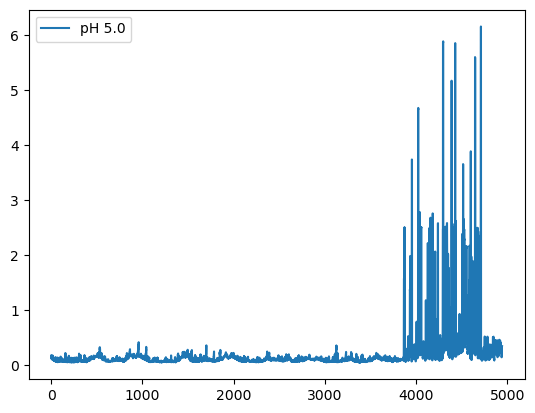

In [12]:
import matplotlib.pyplot as plt

plt.plot(rmsf_pH5, label='pH 5.0')
plt.legend()
plt.show()

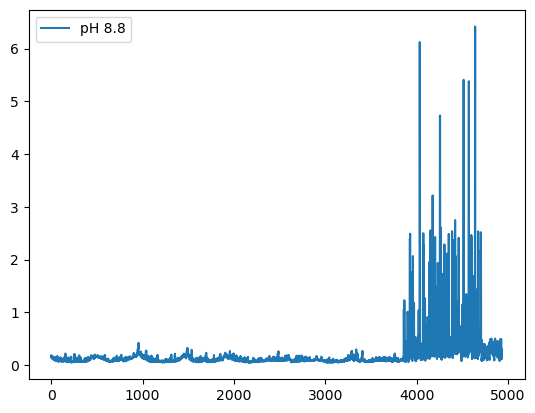

In [13]:
plt.plot(rmsf_pH88, label='pH 8.8')
plt.legend()
plt.show()

In [1]:
!ls

1L6X.pdb	1L6X_pH5.dcd  1L6X_pH88.dcd  1L6X_pH8.8.pdb
1L6X_pH5.0.pdb	1L6X_pH5.log  1L6X_pH88.log  exp_25.ipynb
